# Scipy Stats

I recently was the TA for a [Monte Carlo methods](https://en.wikipedia.org/wiki/Monte_Carlo_method) course which involved sampling many statistical distributions. Often students would write standalone functions to draw samples which was prone to error. While knowing how to code up an exotic distribution can be useful, I encourage students not to re-invent the wheel every assignment. The `scipy.stats` package contains many probability distributions and useful functions when doing statitics. 

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Normal Distribution

We will start by exploring the Normal distribution. 

$$
 \mathcal{N}(x\;|\;\mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}\;e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}
$$


All statistical distribution objects in `scipy.stats` package contain useful methods. The `norm` class has:

- pdf(x) to calculate the Probability density function at x.
- cdf(x) to calculate the Cumulative distribution function at x.
- sf(x) to calculate the Survival function (also defined as 1 - cdf, but sf is sometimes more accurate).
- interval(alpha) to calculate the endpoints of the range that contains alpha percent of the distribution
- rvs(size) to generate random variates of abitrary size.
- fit(data) to estimate the parameters for generic data.

and many more

The `stats.norm` class by default creates a standard normal distribution with mean 0 and varience of 1. 

In [2]:
dist = stats.norm()

print('Distribution Mean: \t{0:.2f}'.format(dist.mean()))
print('Distribution Varience: \t{0:.2f}'.format(dist.var()))

Distribution Mean: 	0.00
Distribution Varience: 	1.00


### Visualization

Let's plot the PDF and CDF to get a better understanding

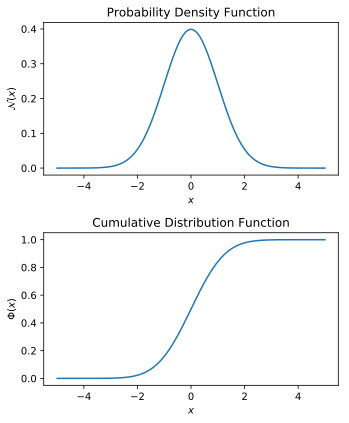

In [3]:
fig, axs = plt.subplots(2,1, figsize=(5,6))

x = np.linspace(-5, 5, 200)

axs[0].plot(x, dist.pdf(x))
axs[0].set(title='Probability Density Function',
           xlabel='$x$', 
           ylabel='$\mathcal{N}(x)$')

axs[1].plot(x, dist.cdf(x))
axs[1].set(title='Cumulative Distribution Function', 
           xlabel='$x$', 
           ylabel='$\Phi(x)$')
plt.tight_layout()

### Location and Shape Parameteres

We can pass to the distribution object a parameter `loc` which controls the mean and `scale` which controls the standard deviation. Lets create a variety of distributions by varying these paramerters

In [4]:
parameters =pd.DataFrame([
    [0,  0.2],
    [0,  1.0],
    [0,  5.0], 
    [-2, 0.5]], columns=('Mean', 'Varience'))
parameters

,Mean,Varience
0,0,0.2
1,0,1.0
2,0,5.0
3,-2,0.5


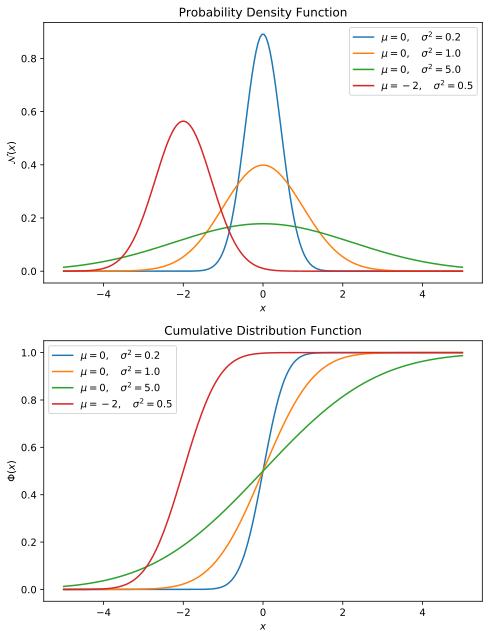

In [5]:
fig, axs = plt.subplots(2,1, figsize=(7,9))

for _, mean, var in parameters.itertuples():
    
    dist = stats.norm(loc=mean, scale=np.sqrt(var))
    
    axs[0].plot(x, dist.pdf(x), 
                label = r'$\mu = {},\quad \sigma^2 = {}$'.format(mean, var))
    axs[0].set(title='Probability Density Function',
           xlabel='$x$', 
           ylabel='$\mathcal{N}(x)$')
    axs[0].legend()
    
    axs[1].plot(x, dist.cdf(x),
                label = r'$\mu = {},\quad \sigma^2 = {}$'.format(mean, var))
    axs[1].set(title='Cumulative Distribution Function', 
           xlabel='$x$', 
           ylabel='$\Phi(x)$')
    axs[1].legend()
plt.tight_layout()

### Random Variate Samples

To sample a distribution the `rvs` method is used. For reproducibility I will set the `random_state`. 

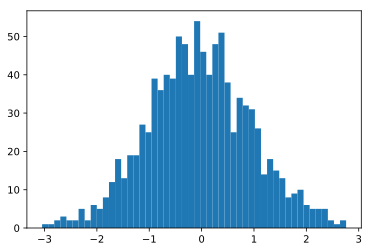

In [6]:
dist = stats.norm()
samples = dist.rvs(1000, random_state=0)

plt.hist(samples, bins=50);

**Numpy Random**

If you are only interested in random variate samples sometimes it is easier to use the `numpy.random` modul ([See numpy docs](https://docs.scipy.org/doc/numpy/reference/routines.random.html)) which also contains many distributions. By setting the seed we can create the same results as above

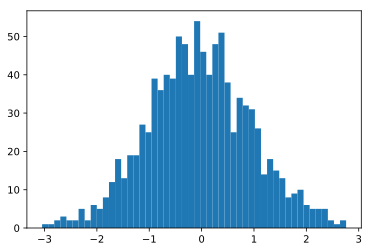

In [7]:
np.random.seed(0)
samples = np.random.normal(size=1000)
plt.hist(samples, bins=50);

### Parameter Fitting

Often we are interested in fitting the parameters of a distribution to data we have collected. Lets generate some data first. 

In [8]:
data = stats.norm.rvs(loc=5, scale=3, size=1000, random_state=42)

The `fit` method returns the shape parameters that best fit the given data

In [9]:
mu, std = stats.norm.fit(data)
print('Best fit mean: \t{}'.format(mu))
print('Best fit std: \t{}'.format(std))

Best fit mean: 	5.0579961674669764
Best fit std: 	2.9361786232420632


We can use these values to overlay the fitted distribution onto a normalised histogram of the data

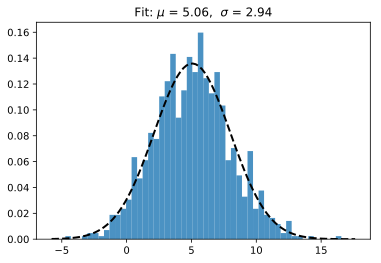

In [10]:
# Plotting the histogram of the data
plt.hist(data, bins=50, density=True, alpha=.8)

# Plotting the PDF of the fitted distribuiton
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
fitted_dist = stats.norm(mu, std)
plt.plot(x, fitted_dist.pdf(x), 'k--', linewidth=2)
plt.title("Fit: $\mu$ = {:.2f},  $\sigma$ = {:.2f}".format(mu, std));

### Shaded Distributions
A common visualization is a shaded normal distribution to highlight the tails. Let's take the fitted ditribution from the previous example and fill in the 95% cofidence regions. I made a simple `fill_dist` function to aid in the task.

In [11]:
def fill_dist(x1, x2, dist,  **kwargs):
    """Shade a distribution between x1, and x2"""
    x_range = np.linspace(x1, x2)
    plt.fill_between(x_range, dist.pdf(x_range), alpha=0.5, **kwargs)

The `interval` function returns the bounds which include a given percentage of the data

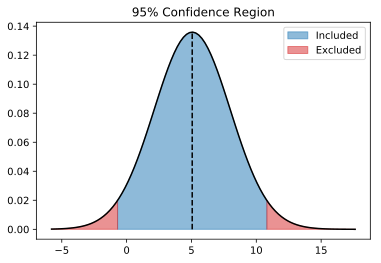

In [12]:
lower, upper = fitted_dist.interval(.95)
plt.plot(x, fitted_dist.pdf(x), 'k')
fill_dist(lower, upper, fitted_dist, color='C0', label='Included')
fill_dist(upper, xmax, fitted_dist, color='C3', label='Excluded')
fill_dist(xmin, lower, fitted_dist, color='C3')
plt.vlines(fitted_dist.mean(), 0, 
           fitted_dist.pdf(fitted_dist.mean()), linestyles='dashed')
plt.title('95% Confidence Region')
plt.legend()

## Other Distributions

There are many different distributions we can choose from such as the Chi Squared distribution. 

$$
P(x) = {\frac {1}{2^{k/2}\Gamma (k/2)}}\;x^{{\frac {k}{2}}-1}e^{-{\frac {x}{2}}}
$$

Often it can be useful to vary a shape parameter and see how it affects the distribution. for example

Text(0.5,1,'$\\chi^2_k$ for k degrees of freedom')

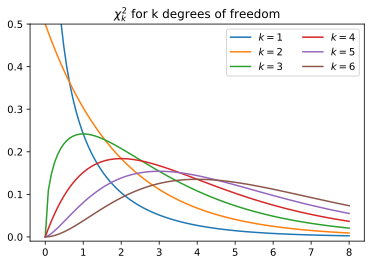

In [13]:
x = np.linspace(0, 8, 100)
for i in range(1, 7):
    dist = stats.chi2(i)
    plt.plot(x, dist.pdf(x), label=r'$k={}$'.format(i))
    plt.ylim(-.01, 0.5)
    plt.legend(ncol=2)

plt.title('$\chi^2_k$ for k degrees of freedom')

## Multivariate Normal

The final distribution I wanted to discuss was the `multivariate_normal` distribution. The probability density function is defined as 
$$
f(x) = \frac{1}{\sqrt{(2 \pi)^k \det \Sigma}}
       \exp\left( -\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) \right),
$$
where $\mu$ is the mean, $\Sigma$ the covariance matrix,
and $k$ is the dimension of the space where $x$ takes values. 

In [14]:
mu = [2,1]
sigma = [[1.3, .3], 
          [0.3, .5]]
N = stats.multivariate_normal(mu, sigma)

I would like to create a contour plot of this distribution. First we will generate the grid of $x$ and $y$ coordinates using `np.meshgrid`. 

In [15]:
x = np.linspace(-1, 5, 200)
y = np.linspace(-1, 3, 200)
X, Y = np.meshgrid(x, y)

From the documentation it reads

> The inputs can be any shape of array, as long as the last axis labels the components. 

In order to calculate our pdf at every $xy$ point we need to stack the data into an $NxMx2$ array. This can be done with `np.dstack` which concatenates 2D arrays along a third axis

In [16]:
samples = np.dstack((X, Y))

Now we can call `plt.contourf` with the pdf as the $Z$ component

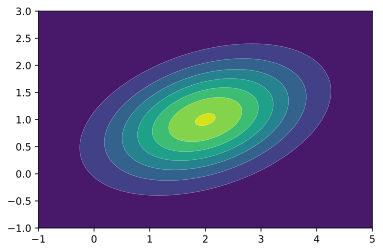

In [17]:
plt.contourf(X, Y, N.pdf(samples))

Consider the following mixture of 2D distributions, 

$$
\pi(x,y) = 0.6\mathcal{N}(\mu_1, \Sigma_1) + 0.4\mathcal{N}(\mu_2, \Sigma_2)
$$

where, 

\begin{align}
\mu_1 &= \begin{bmatrix}3\\0\end{bmatrix}, \quad
&\Sigma_1 &= \begin{bmatrix}
1.5 & 0 \\
0 & 0.5
\end{bmatrix}\\
\mu_2 &= \begin{bmatrix}-1.25\\2.5\end{bmatrix}, \quad
&\Sigma_2 &= \begin{bmatrix}
0.5 & -0.6 \\
-0.6 & 1.0
\end{bmatrix}
\end{align}

In [18]:
mu1 = [3,0]
sigma1 = [[1.5, 0], 
          [0, 0.5]]
N1 = stats.multivariate_normal(mu1, sigma1)

mu2 = [-1.25,2.5]
sigma2 = [[0.5, -0.6], 
          [-0.6, 1.0]]
N2 = stats.multivariate_normal(mu2, sigma2)

Now we can define a function to sample the PDF

In [19]:
def pi(sample):
    """A mixed Gaussian model."""
    return 0.6*N1.pdf(sample) + 0.4*N2.pdf(sample)

Plotting in the same manner as before but now calling `pi` instead.

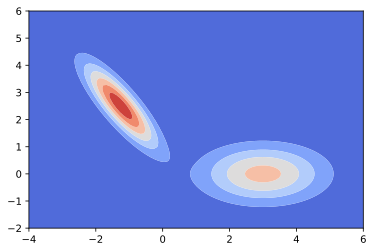

In [20]:
x = np.linspace(-4, 6, num=100)
y = np.linspace(-2, 6, num=100)
X, Y = np.meshgrid(x, y)
plt.contourf(x, y, pi(np.dstack((X, Y))), cmap='coolwarm')

## Conclusion

Sampling and exploring a wide variety of statistical distributions is made easier with the `scipy.stats` module. Creating your own functions each time you want to draw a sample is error prone and ineffient. I think it's important to know what tools are available and I hope this post shines some light on one useful example. 

I hope to do more `scipy` related posts in the future. 